In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore') 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




*Import needed libraries and read _ csv file for the dataset*


In [6]:
url = 'https://drive.google.com/file/d/1c8q_ubY6D4jAq7qU2jewSEulODD3HiJx/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
jk = pd.read_csv(path)

In [7]:
#replace categroical or range values

jk['lt_order_cluster'] = jk['lt_order_cluster'].replace("2-4","3")
jk['lt_order_cluster'] = jk['lt_order_cluster'].replace("5+","5")
#jk['lt_order_cluster'] = jk['lt_order_cluster'].replace("2-4","3")
#jk['lt_order_cluster'].replace("5+","5")
#pd.to_numeric(jk['lt_order_cluster'])
jk.head(10)

,Unnamed: 0,analytical_customer_id,voucher_group,segment_frequency_rest,segment_monetary_rest,segment_discount_dh_rest,segment_variety_rest,segment_basket_rest,lt_order_cluster,recency_cluster,lt_cluster,times_in_churn_segments,preferred_order_period_all_verts,loyalty_status_all_verts,returning_probability_segments,orders,margin
0,5,00004b56-d951-4693-aa69-d1986cac9ae0,lv-2|3|18,B,M,N,H,2,5,90-120,720+,4+,multi weekday | multi daytime,Inactive Loyal,0.7-1,0,0.00
1,11,00008a4a-0e9a-4c05-8cef-01feaf7d5254,hv-2|10|25,E,L,N,N,1,5,120-180,360-720,4+,single weekday | single daytime,Inactive Loyal,0.5-0.7,2,7.91
2,24,000147e2-b93d-4ca8-bd05-25014e0f7874,Control Group,E,M,H,N,1,5,120-180,720+,4+,single weekday | single daytime,Inactive Loyal,0.5-0.7,11,1.06
3,29,000172b4-f65e-43f2-b401-02f9c377c892,hv-1|10|13,B,L,N,H,2,5,30-60,<180,2-3,multi weekday | multi daytime,Inactive Multiple Orders,0.7-1,1,5.88
4,32,0001b27c-9814-4ec4-8eb9-2465f82b0c82,lv-1|3|9,F,L,N,N,1,1,90-120,<180,1,single weekday | single daytime,Inactive Churning 1 Timer,0.3-0.5,0,0.00
5,36,0001dd5a-29bb-4b07-b3f5-0fba633da4fb,lv-3|3|27,E,L,N,N,1,5,60-90,180-360,2-3,single weekday | single daytime,Inactive Multiple Orders,0.5-0.7,0,0.00
6,45,00022356-5916-4b95-81e1-d797df8f3697,mv-2|6|20,E,M,N,N,1,3,60-90,720+,2-3,single weekday | single daytime,Inactive Multiple Orders,0.3-0.5,0,0.00
7,54,00028c02-5120-496f-a753-1036c6717424,mv-3|6|30,B,L,N,L,2,5,120-180,720+,4+,multi weekday | multi daytime,Inactive Loyal,0.7-1,0,0.00
8,61,0002e000-4f00-4d97-bb33-6f5c08d915b0,mv-1|6|10,E,M,N,N,1,3,120-180,720+,2-3,single weekday | single daytime,Inactive Multiple Orders,0.3-0.5,0,0.00
9,62,0002f20f-e06a-402a-b428-76b5832a0049,Control Group,D,M,N,M,2,5,60-90,720+,4+,multi weekday | multi daytime,Inactive Loyal,0.7-1,2,15.19


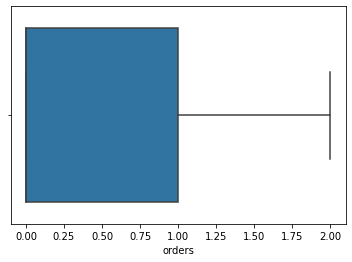

In [8]:
## orders boxplot to check outliers
sns.boxplot(jk.orders, showfliers=False)



In [9]:
"""
# outliers removal from orders.
Q1 = jk['orders'].quantile(0.25)
Q3 = jk['orders'].quantile(0.75)
IQR = Q3 - Q1    

filter = (jk['orders'] >= Q1 - 1.5 * IQR) & (jk['orders'] <= Q3 + 1.5 *IQR)
df = jk.loc[filter] 
"""

"\n# outliers removal from orders.\nQ1 = jk['orders'].quantile(0.25)\nQ3 = jk['orders'].quantile(0.75)\nIQR = Q3 - Q1    \n\nfilter = (jk['orders'] >= Q1 - 1.5 * IQR) & (jk['orders'] <= Q3 + 1.5 *IQR)\ndf = jk.loc[filter] \n"

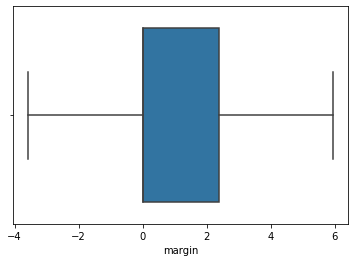

In [10]:
df = jk
## margin boxplot to check outliers
#sns.boxplot(x=df.margin)
sns.boxplot(jk.margin, showfliers=False)

In [11]:
#df.head()
df["times_in_churn_segments"]


0          4+
1          4+
2          4+
3         2-3
4           1
         ... 
237483      1
237484      1
237485      1
237486    2-3
237487      1
Name: times_in_churn_segments, Length: 237488, dtype: object

In [12]:
#using replace to get range values dtype to int64
df["times_in_churn_segments"] = df["times_in_churn_segments"].replace("4+","5")
df["times_in_churn_segments"] = df["times_in_churn_segments"].replace("2-3","3")
df.shape

(237488, 17)

In [13]:
#removing object type values for clustring
df['lt_cluster'] = df['lt_cluster'].replace("180-360","270")
df['lt_cluster'] = df['lt_cluster'].replace("360-720","540")
df['lt_cluster'] = df['lt_cluster'].replace("720+","720")
df['lt_cluster'] = df['lt_cluster'].replace("<180","180")

In [14]:

# storing first 3 letters of voucher_group // WE NEED THE CODEPHRASE OF VOUCHER
for i in range( len(df)):
  df.iloc[i]['voucher_group'] = df.iloc[i].voucher_group[:4]
  

In [15]:
df.head()

,Unnamed: 0,analytical_customer_id,voucher_group,segment_frequency_rest,segment_monetary_rest,segment_discount_dh_rest,segment_variety_rest,segment_basket_rest,lt_order_cluster,recency_cluster,lt_cluster,times_in_churn_segments,preferred_order_period_all_verts,loyalty_status_all_verts,returning_probability_segments,orders,margin
0,5,00004b56-d951-4693-aa69-d1986cac9ae0,lv-2|3|18,B,M,N,H,2,5,90-120,720,5,multi weekday | multi daytime,Inactive Loyal,0.7-1,0,0.00
1,11,00008a4a-0e9a-4c05-8cef-01feaf7d5254,hv-2|10|25,E,L,N,N,1,5,120-180,540,5,single weekday | single daytime,Inactive Loyal,0.5-0.7,2,7.91
2,24,000147e2-b93d-4ca8-bd05-25014e0f7874,Control Group,E,M,H,N,1,5,120-180,720,5,single weekday | single daytime,Inactive Loyal,0.5-0.7,11,1.06
3,29,000172b4-f65e-43f2-b401-02f9c377c892,hv-1|10|13,B,L,N,H,2,5,30-60,180,3,multi weekday | multi daytime,Inactive Multiple Orders,0.7-1,1,5.88
4,32,0001b27c-9814-4ec4-8eb9-2465f82b0c82,lv-1|3|9,F,L,N,N,1,1,90-120,180,1,single weekday | single daytime,Inactive Churning 1 Timer,0.3-0.5,0,0.00


In [16]:
#label encoding
#Redifining categorical values , ready for computation
lb_make = LabelEncoder()
df['segment_frequency_rest'] = lb_make.fit_transform(df['segment_frequency_rest'])
df['segment_discount_dh_rest'] = lb_make.fit_transform(df['segment_discount_dh_rest'])
df['segment_monetary_rest'] = lb_make.fit_transform(df['segment_monetary_rest'])
df['segment_variety_rest'] =  lb_make.fit_transform(df['segment_variety_rest'])
df['recency_cluster'] = lb_make.fit_transform(df['recency_cluster'])
df['preferred_order_period_all_verts'] = lb_make.fit_transform(df['preferred_order_period_all_verts'])
df['returning_probability_segments'] = lb_make.fit_transform(df['returning_probability_segments'])
df['loyalty_status_all_verts'] = lb_make.fit_transform(df['loyalty_status_all_verts'])
df['voucher_group'] = lb_make.fit_transform(df['voucher_group'])

#df.head()


In [17]:
#df.head(25)

Scatter plot for EDA

Text(0, 0.5, 'orders')

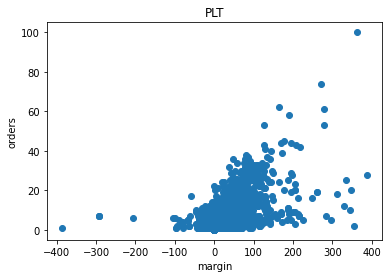

In [18]:
### checking for growth / margin 

fig, ax = plt.subplots()



ax.scatter(df['margin'],df['orders'] )
# set a title and labels
ax.set_title('PLT')
ax.set_xlabel('margin')
ax.set_ylabel('orders')

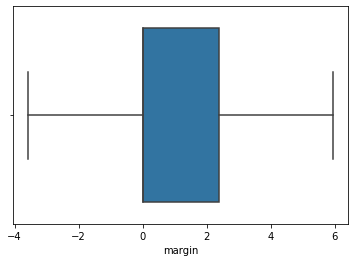

In [19]:
#checking  margin   boxplot for EDA
sns.boxplot(df.margin , showfliers =False)

In [20]:
df.shape

(237488, 17)

In [21]:

df.head()

,Unnamed: 0,analytical_customer_id,voucher_group,segment_frequency_rest,segment_monetary_rest,segment_discount_dh_rest,segment_variety_rest,segment_basket_rest,lt_order_cluster,recency_cluster,lt_cluster,times_in_churn_segments,preferred_order_period_all_verts,loyalty_status_all_verts,returning_probability_segments,orders,margin
0,5,00004b56-d951-4693-aa69-d1986cac9ae0,5,1,2,2,0,2,5,3,720,5,0,1,3,0,0.00
1,11,00008a4a-0e9a-4c05-8cef-01feaf7d5254,2,4,1,2,3,1,5,0,540,5,3,1,2,2,7.91
2,24,000147e2-b93d-4ca8-bd05-25014e0f7874,0,4,2,0,3,1,5,0,720,5,3,1,2,11,1.06
3,29,000172b4-f65e-43f2-b401-02f9c377c892,1,1,1,2,0,2,5,1,180,3,0,2,3,1,5.88
4,32,0001b27c-9814-4ec4-8eb9-2465f82b0c82,4,5,1,2,3,1,1,3,180,1,3,0,1,0,0.00


In [22]:
"""
bar graph
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()
"""



'\nbar graph\ngenders = df.Gender.value_counts()\nsns.set_style("darkgrid")\nplt.figure(figsize=(10,4))\nsns.barplot(x=genders.index, y=genders.values)\nplt.show()\n'

Using sklearn K means clustring which is an unsupervised segmentation method

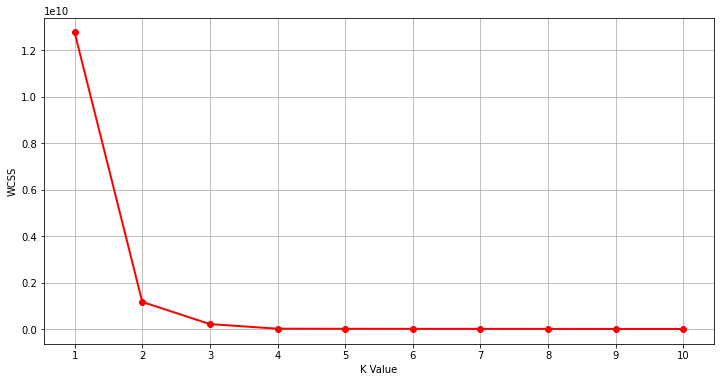

In [23]:
## k means algorithm


wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()


Silhouette analysis

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually


Elbow method

We can find the optimum value for K using an Elbow point graph. We randomly initialise the K-Means algorithm for a range of K values and will plot it against the WCSS for each K value.


In [24]:
### we get an elbow value of 3
### Below you can find the silhouette score analysis , for a value of 3 clusters .
KMeanzz= KMeans(n_clusters=2)
KMeanzz.fit(df.iloc[:,3:])
label=KMeanzz.predict(df.iloc[:,3:])

#print(f'Silhouette Score(n=3): {silhouette_score(df.iloc[:,3:], label)}')

##remove comment from above to check , for a faster transition.


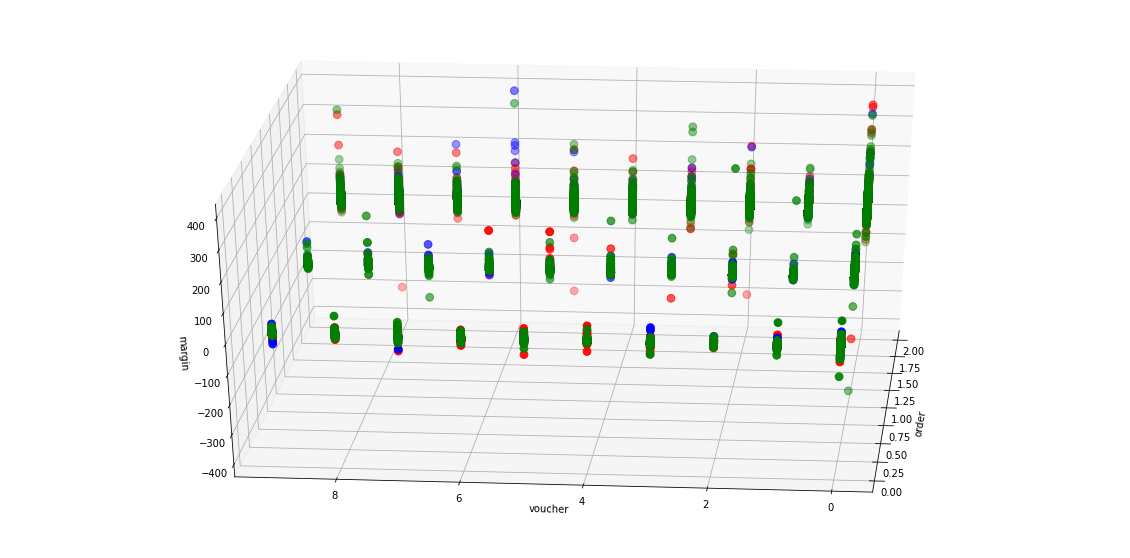

In [25]:
## kmeans cluster's with elbow value of 3 , based and verified via WCSS

km = KMeans(n_clusters=3)
clusters = km.fit_predict(df.iloc[:,3:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( df["segment_discount_dh_rest"][df.label == 0],df.voucher_group[df.label == 0], df["margin"][df.label == 0], c='blue', s=60)
ax.scatter(df["segment_discount_dh_rest"][df.label == 1],df.voucher_group[df.label == 1], df["margin"][df.label == 1],  c='red', s=60)
ax.scatter(df["segment_discount_dh_rest"][df.label == 2],df.voucher_group[df.label == 2], df["margin"][df.label == 2],  c='green', s=60)

### 3d plot - showing positions of our clusters which are color coded respective to the measurements / margin / voucher_group
ax.view_init(30, 185)
plt.xlabel("order")
plt.ylabel("voucher")
ax.set_zlabel('margin')
plt.show()

Text(0, 0.5, 'margin')

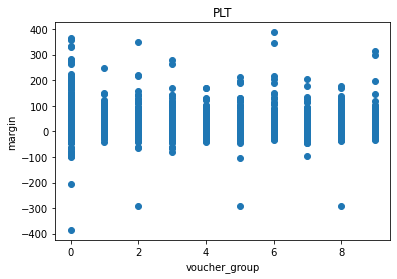

In [26]:
## scatter plot of voucher / margin for analysis
fig, ax = plt.subplots()


ax.scatter(df['voucher_group'],df['margin'] )
# set a title and labels
ax.set_title('PLT')
ax.set_xlabel('voucher_group')
ax.set_ylabel('margin')
  

The margins are higher for voucher id = 6 , which is voucher code = lv-3

Text(0, 0.5, 'orders')

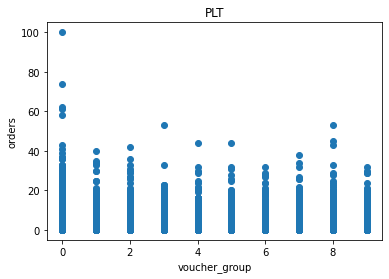

In [27]:
## scatter plot value's for voucher / orders
fig, ax = plt.subplots()


ax.scatter(df['voucher_group'],df['orders'] )
# set a title and labels
ax.set_title('PLT')
ax.set_xlabel('voucher_group')
ax.set_ylabel('orders')
  

The orders are higher for voucher id =0 , more growth , voucher code = lv-1

In [28]:
df.head(10)


,Unnamed: 0,analytical_customer_id,voucher_group,segment_frequency_rest,segment_monetary_rest,segment_discount_dh_rest,segment_variety_rest,segment_basket_rest,lt_order_cluster,recency_cluster,lt_cluster,times_in_churn_segments,preferred_order_period_all_verts,loyalty_status_all_verts,returning_probability_segments,orders,margin,label
0,5,00004b56-d951-4693-aa69-d1986cac9ae0,5,1,2,2,0,2,5,3,720,5,0,1,3,0,0.00,2
1,11,00008a4a-0e9a-4c05-8cef-01feaf7d5254,2,4,1,2,3,1,5,0,540,5,3,1,2,2,7.91,0
2,24,000147e2-b93d-4ca8-bd05-25014e0f7874,0,4,2,0,3,1,5,0,720,5,3,1,2,11,1.06,2
3,29,000172b4-f65e-43f2-b401-02f9c377c892,1,1,1,2,0,2,5,1,180,3,0,2,3,1,5.88,1
4,32,0001b27c-9814-4ec4-8eb9-2465f82b0c82,4,5,1,2,3,1,1,3,180,1,3,0,1,0,0.00,1
5,36,0001dd5a-29bb-4b07-b3f5-0fba633da4fb,6,4,1,2,3,1,5,2,270,3,3,2,2,0,0.00,1
6,45,00022356-5916-4b95-81e1-d797df8f3697,8,4,2,2,3,1,3,2,720,3,3,2,1,0,0.00,2
7,54,00028c02-5120-496f-a753-1036c6717424,9,1,1,2,1,2,5,0,720,5,0,1,3,0,0.00,2
8,61,0002e000-4f00-4d97-bb33-6f5c08d915b0,7,4,2,2,3,1,3,0,720,3,3,2,1,0,0.00,2
9,62,0002f20f-e06a-402a-b428-76b5832a0049,0,3,2,2,2,2,5,2,720,5,0,1,3,2,15.19,2


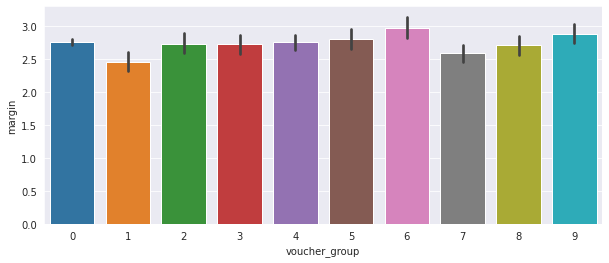

In [29]:
## plotting a more visually appeling bar plot

genders = df.label.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))




sns.barplot( x=df.voucher_group ,y=df.margin)
plt.show()








Highest maring values are for voucher_group id =6 , which is voucher = lv-3


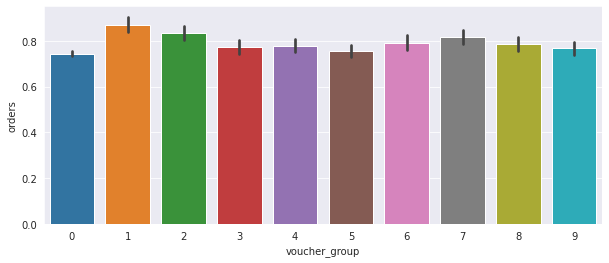

In [30]:
## bar plot for orders / growth
genders = df.label.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))



sns.barplot( x=df.voucher_group ,y=df.orders)
plt.show()

In [31]:
df.margin


0         0.00
1         7.91
2         1.06
3         5.88
4         0.00
          ... 
237483    0.00
237484    0.00
237485    0.00
237486    6.15
237487    0.00
Name: margin, Length: 237488, dtype: float64

In [32]:
df_new = df[df['label'] == 0]
df_new1 = df[df['label'] == 1]
df_new2 = df[df['label'] == 2]
  
print(df_new)

        Unnamed: 0                analytical_customer_id  ...  margin  label
1               11  00008a4a-0e9a-4c05-8cef-01feaf7d5254  ...    7.91      0
10              70  00030f77-c0e0-4168-a633-3ffc6b128bba  ...    0.00      0
15              88  00041a70-e584-4385-bcf6-31d959dbaecc  ...    0.00      0
18              93  00043d9d-fbd7-4d3d-b9b0-b2a092fed2a6  ...    0.00      0
20              97  00046ae9-1701-400c-8dc1-59da3c542c89  ...    0.00      0
...            ...                                   ...  ...     ...    ...
237460     1249560  fff7132a-e57b-429f-ac4c-3d0136045e76  ...   -2.26      0
237465     1249580  fff8c282-3242-4f8e-a116-bd91a6182546  ...    7.66      0
237470     1249605  fffa3a93-4f84-4b1e-9bf1-59e66dc36d27  ...    9.85      0
237478     1249640  fffc5e06-55b2-4122-bee9-39593decb13d  ...   21.13      0
237479     1249647  fffcddab-6b2e-4e94-a605-2f44bc2183d2  ...    4.19      0

[47696 rows x 18 columns]


In [33]:
df_new.head()
pc = df_new.voucher_group.value_counts()
print(pc)

0    22832
5     2870
6     2815
1     2766
3     2761
8     2758
7     2755
9     2746
2     2711
4     2682
Name: voucher_group, dtype: int64


Checking for the highest count values of customer using certain vouchers  , which kmeans lables has returned to us.

In [34]:
## checking avg , margin mean values to get to best voucher
print(df_new.margin.mean())
print(df_new1.margin.mean())
print(df_new2.margin.mean())

3.2155834870848805
1.8567930065342122
3.763134894351999


Highest margins are of the set of customers in label 1 , where the most used voucher is voucher_group = hv-1

In [35]:
df_new['voucher_group']
print(df_new.voucher_group.value_counts())
df_new0 = df[df['voucher_group'] == 0]

0    22832
5     2870
6     2815
1     2766
3     2761
8     2758
7     2755
9     2746
2     2711
4     2682
Name: voucher_group, dtype: int64


In [36]:
#print(df[df['voucher_group'] == 0])

The voucher_group = 1 || hv-1 , is the best voucher to be given to increase the Growth (no. of orders) and Revenue

In [37]:
##conclusion

The best voucher to be used to increase margin andgrowth , is calculated by looking for themost used voucher  within a clustered group of customerswhich has the highest margin andgrowth ratio.We have used k-means clustering for customer segmentationto find out that the Best margin isoffered by the voucher id =6  , which is voucher code= lv-3 .For best growth , we have considered the most usedvoucher among the best avg margin given,Which is Given as voucher id =0 , which is vouchercode = lv-1 .Thus the best overall voucher is voucher id = 0 whichwould increase the growth , and wouldincrease revenue and orders.Voucher code = lv-1 ,is the best voucher found throughData analysis.


In [38]:
###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237488 entries, 0 to 237487
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        237488 non-null  int64  
 1   analytical_customer_id            237488 non-null  object 
 2   voucher_group                     237488 non-null  int64  
 3   segment_frequency_rest            237488 non-null  int64  
 4   segment_monetary_rest             237488 non-null  int64  
 5   segment_discount_dh_rest          237488 non-null  int64  
 6   segment_variety_rest              237488 non-null  int64  
 7   segment_basket_rest               237488 non-null  int64  
 8   lt_order_cluster                  237488 non-null  object 
 9   recency_cluster                   237488 non-null  int64  
 10  lt_cluster                        237488 non-null  object 
 11  times_in_churn_segments           237488 non-null  o

In [39]:
df.head()

,Unnamed: 0,analytical_customer_id,voucher_group,segment_frequency_rest,segment_monetary_rest,segment_discount_dh_rest,segment_variety_rest,segment_basket_rest,lt_order_cluster,recency_cluster,lt_cluster,times_in_churn_segments,preferred_order_period_all_verts,loyalty_status_all_verts,returning_probability_segments,orders,margin,label
0,5,00004b56-d951-4693-aa69-d1986cac9ae0,5,1,2,2,0,2,5,3,720,5,0,1,3,0,0.00,2
1,11,00008a4a-0e9a-4c05-8cef-01feaf7d5254,2,4,1,2,3,1,5,0,540,5,3,1,2,2,7.91,0
2,24,000147e2-b93d-4ca8-bd05-25014e0f7874,0,4,2,0,3,1,5,0,720,5,3,1,2,11,1.06,2
3,29,000172b4-f65e-43f2-b401-02f9c377c892,1,1,1,2,0,2,5,1,180,3,0,2,3,1,5.88,1
4,32,0001b27c-9814-4ec4-8eb9-2465f82b0c82,4,5,1,2,3,1,1,3,180,1,3,0,1,0,0.00,1


In [40]:
### Simple Linear Regression for single dimensional analysis.


In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 



In [42]:


X = df.iloc[:,16:17]

y = df.iloc[:,2:3]
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)


regressor = LinearRegression()
regressor.fit(X_train, y_train)



#print(X)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

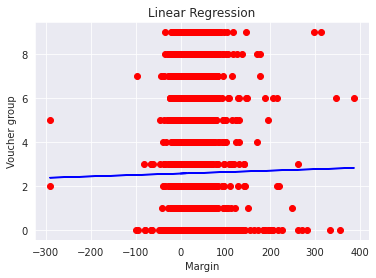

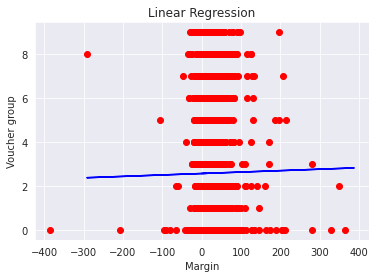

In [43]:
viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Linear Regression')
viz_train.xlabel('Margin')
viz_train.ylabel('Voucher group')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Linear Regression')
viz_test.xlabel('Margin')
viz_test.ylabel('Voucher group')
viz_test.show()

In [44]:
# Predicting the Test set results
## For predicting the voucher values based on margin ,value provided through simple linear regression.


y_pred = jk.iloc[25:3] 
#print(y_pred)
#y_pred = regressor.predict(X_test)

For using this model to predict which vouchers should be given for a test dataset.


In [45]:
"""
#if you have  y for predicting x , test set.
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')
"""

"\n#if you have  y for predicting x , test set.\ny_pred = model.intercept_ + model.coef_ * x\nprint('predicted response:', y_pred, sep='\n')\n"

In [46]:
"""
x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)
"""

'\nx_new = np.arange(5).reshape((-1, 1))\nprint(x_new)\ny_new = model.predict(x_new)\nprint(y_new)\n'

In [47]:
### to check for cluster files , it has been grouped by the kmeans clustring and a seperate column has been added to the df file named "label"

In [48]:
df['label']

0         2
1         0
2         2
3         1
4         1
         ..
237483    1
237484    1
237485    1
237486    1
237487    1
Name: label, Length: 237488, dtype: int32